<a href="https://colab.research.google.com/github/nkorzounUD/DSPS_NKorzoun/blob/main/HW4/HW4_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by Andrew Crossman @AndrewCrossman for DSPS Homework 4

**Problem 1 From** [Hogg and Foreman-Mackey 2017](https://arxiv.org/pdf/1710.06068.pdf)

The chosen distribution shall be: *Laplace*

In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pylab as plt
%pylab inline
#plt.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def makePlots(means,vars,skews,kurts,x,xlabel,mean,var,skew,kurt):
  ''' This Function produces a 2x2 plot that shows the means, skews, vars, and
  kurts vs x

  Parameters:
  means   -- a list of means for each value of k
  vars    -- a list of varainces for each value of k
  skews   -- a list of skews for each value of k
  kurts   -- a list of kurtosis for each value of k
  '''
  fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))
  ax1.scatter(x,means, alpha=0.5, label="Sampled Mean")
  ax1.axhline(mean, color='k', label="Analytical Mean")
  ax1.set_xscale('log')
  ax1.set_title("Mean Value vs "+xlabel)
  ax1.set_xlabel(xlabel)
  ax1.set_ylabel("Mean Value")
  ax1.grid()
  ax1.legend(loc="lower right")

  ax2.scatter(x, vars, alpha=0.5, label="Sampled Variance")
  ax2.axhline(var, color='k', label="Analytical Variance")
  ax2.set_xscale('log')
  ax2.set_title("Variance vs "+xlabel)
  ax2.set_xlabel(xlabel)
  ax2.set_ylabel("Variance")
  ax2.grid()
  ax2.legend(loc="upper right")

  ax3.scatter(x, skews, alpha=0.5, label="Sampled Skewness")
  ax3.axhline(skew, color='k', label="Analytical Skewness")
  ax3.set_xscale('log')
  ax3.set_title("Skewness vs "+xlabel)
  ax3.set_xlabel(xlabel)
  ax3.set_ylabel("Skewness")
  ax3.grid()
  ax3.legend(loc="lower right")

  ax4.scatter(x, kurts, alpha=0.5, label="Sampled Kurtosis")
  ax4.axhline(kurt, color='k', label="Analytical Kurtosis")
  ax4.set_xscale('log')
  ax4.set_title("Kurtosis vs "+xlabel)
  ax4.set_xlabel(xlabel)
  ax4.set_ylabel("Kurtosis")
  ax4.grid()
  ax4.legend(loc="lower right")

  fig1.tight_layout()
  return ()

In [3]:
def FindExp(dis,k):
  ''' This function finds the expectation value of a distribution

  Parameters:
  dis   -- a distributions values
  k     -- the value used to find each element of dis

  Returns:
  Expectation value of distribution
  '''
  return (np.sum(np.multiply(dis,k))/len(k))

In [23]:
def FindVar(dis,k,mean):
  ''' This function finds the variance of a distribution

  Parameters:
  dis   -- a distributions values
  k     -- the value used to find each element of dis
  mean  -- the expectation value of the distribtuion

  Returns:
  Variance of distribution
  '''
  temp1 = [x - mean for x in k]
  temp2 = np.multiply(temp1,temp1)
  temp3 = np.multiply(temp2,dis)
  #return (np.sum((k-mean)**2 * dis)/len(k))
  #return (np.sum(np.multiply(np.multiply(k-mean,k-mean),dis)/len(k)))
  return (np.sum(temp3)/len(k))

In [6]:
def FindSkew(dis,k,mean,var):
  ''' This function finds the skewness of a distribution

  Parameters:
  dis   -- a distributions values
  k     -- the value used to find each element of dis
  mean  -- the expectation value of the distribution
  var   -- the variance of the distribution

  Returns:
  Skewness of distribution
  '''
  cubed = np.sum(np.multiply(dis,k**3))/len(k)
  numer = cubed + (3*mean*var) - (mean**3)
  denom = var**(3/2)
  return (numer/denom)

In [7]:
def FindKurt(dis,k,mean,var,skew):
  ''' This function finds the skewness of a distribution

  Parameters:
  dis   -- a distributions values
  k     -- the value used to find each element of dis
  mean  -- the expectation value of the distribution
  var   -- the variance of the distribution
  skew  -- the skewness of the distribution

  Returns:
  Kurtosis of distribution
  '''
  return (np.sum((k-mean)**4 * dis)/(len(k)*var**2))

0.0 2.0 0.0 3.0


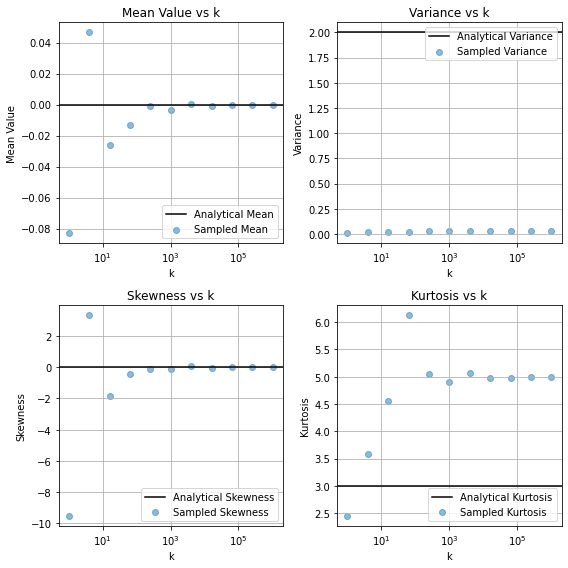

In [24]:
# Set seed to allow for replicability of work
np.random.seed(69)
# make an array of the number of elements to use for each run
x = np.array([4**i for i in range(11)],dtype=int)
# arrays to be filled with the mean, variance, skewness, and kurtosis of the 
# samples whose sizes are found in x
means, vars, skews, kurts = [], [], [], []
true_mean, true_var, true_skew, true_kurt = sp.stats.laplace.stats(
                                            moments='mvsk'
                                            )
for i in x:
  k = np.random.rand(i)-.5
  dis = sp.stats.laplace.pdf(k)

  mean = FindExp(dis,k)
  means.append(FindExp(dis,k))

  var = FindVar(dis,k,mean)
  vars.append(FindVar(dis,k,mean))

  skew = FindSkew(dis,k,mean,var)
  skews.append(FindSkew(dis,k,mean,var))

  kurts.append(FindKurt(dis,k,mean,var,skew))
  #vars.append(dis.var())
  #skews.append(sp.stats.skew(dis))
  #kurts.append(sp.stats.kurtosis(dis))
print(true_mean,true_var,true_skew,true_kurt)
makePlots(means,vars,skews,kurts,x,"k",true_mean,true_var,true_skew,true_kurt);

**CAPTIONS 1:**

*In the above plots we can see the central limit theorem at work. As our sample size increases to inifinity we find that the Mean and Variance of the sample tend to their analytical values (i.e. the values of the entire population). The Skewness and Kurtosis on the otherhand do not, even after much effort was put forth to correct the issue. Because it is well know that they should tend to their analytical answer; however, this indicates that there exists an error in the code. Noticeably, when the sample size is small we see that their are large differences between the sampled values and the analytical ones but as the sample increases this differences become nearly indiscernable.*